In [ ]:
# ------------------------------------------------------------------------
#
# TITLE - paper_fig5_edist.ipynb
# AUTHOR - James Lane
# PROJECT - mw-dfs
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Make the DF paper figures that have to do with eccentricity distributions
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
import numpy as np, pdb, sys, pickle
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import astropy.units as apu

## galpy
from galpy import potential
ro = 8.178 # Gravity 2019
vo = 220
zo = 0.0208 # Bennet + Bovy 2018

sys.path.append('../../src/')
from mw_dfs import plot as project_plot
from mw_dfs import potential as project_potential

# Setup colors
project_colors = project_plot.colors()
rainbow_cmap = project_colors.colourmap('rainbow')

# Potential
pot = potential.MWPotential2014
potential.turn_physical_on(pot,ro=ro,vo=vo)

In [3]:
### Notebook setup
%matplotlib inline
plt.style.use('../../src/mpl/project.mplstyle')
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [4]:
### Keywords

# Directories
fig_dir = './fig/'
data_dir = '/geir_data/scr/lane/projects/mw-dfs/data/data_Sept_2021/df_samples/'

# Figure sizing
columnwidth = 240./72.27
textwidth = 504.0/72.27

# Plotting keywords
label_fontsize = 9

# E-Lz boundary
ELz_bound_rs = np.array([3,6,8])*apu.kpc

# Potential
phi0 = potential.evaluatePotentials(pot,1e12,0).value

# Load data

In [5]:
# Oversampling factor
halo_oversample_factor = 100
disk_oversample_factor = 10

with open(data_dir+'halo_orbits_survey_os_factor'+str(halo_oversample_factor)+'.pkl','rb') as f:
    halo_orbs_apo = pickle.load(f)
##wi
with open(data_dir+'halo_actions_survey_os_factor'+str(halo_oversample_factor)+'.pkl','rb') as f:
    halo_actions_apo = pickle.load(f)
##wi
with open(data_dir+'halo_eELzs_survey_os_factor'+str(halo_oversample_factor)+'.pkl','rb') as f:
    halo_eELzs_apo = pickle.load(f)
##wi

with open(data_dir+'disk_orbits_survey_os_factor'+str(disk_oversample_factor)+'.pkl','rb') as f:
    disk_orbs_apo = pickle.load(f)
##wi
with open(data_dir+'disk_actions_survey_os_factor'+str(disk_oversample_factor)+'.pkl','rb') as f:
    disk_actions_apo = pickle.load(f)
##wi
with open(data_dir+'disk_eELzs_survey_os_factor'+str(disk_oversample_factor)+'.pkl','rb') as f:
    disk_eELzs_apo = pickle.load(f)
##wi

In [6]:
# Turn into lists for parsing
n_orbs_thin = len(disk_orbs_apo[0])
n_orbs_thick = len(disk_orbs_apo[1])
n_orbs_halo = len(halo_orbs_apo[0])

# Order is: betas [0, -0.5, 0.5, 0.7, 0.9] then thin disk, thick disk
orbs_all_apo = [halo_orbs_apo[0],halo_orbs_apo[1],halo_orbs_apo[2],halo_orbs_apo[3],halo_orbs_apo[4],
                disk_orbs_apo[0],disk_orbs_apo[1]]
eELzs_all_apo = [halo_eELzs_apo[0],halo_eELzs_apo[1],halo_eELzs_apo[2],halo_eELzs_apo[3],halo_eELzs_apo[4],
                 disk_eELzs_apo[0],disk_eELzs_apo[1]]
actions_all_apo = [halo_actions_apo[0],halo_actions_apo[1],halo_actions_apo[2],halo_actions_apo[3],halo_actions_apo[4],
                   disk_actions_apo[0],disk_actions_apo[1]]

isDisk = [False,False,False,False,False,True,True]

In [7]:
print(n_orbs_thin)
print(n_orbs_thick)
print(n_orbs_halo)
#assert n_orbs_thin+n_orbs_thick+n_orbs_halo == len(os_all)

1248790
235430
219800


In [8]:
# Different halo mixtures that will be plotted

# Ratio of thin to thick disk stars is ~1/8.5
disk_mixture_arr = np.array([1.0, 1.0/8.5])

halo_mixture_arr_apo = np.array([[1.0 ,0   ,0   ,0   ,0  ], # 100% ergodic
                                 [0   ,0.5 ,0   ,0   ,0  ], # beta = -0.5
                                 [0   ,0   ,0.5 ,0   ,0  ], # beta = 0.5
                                 [0   ,0   ,0   ,0.5 ,0  ], # beta = 0.7
                                 [0   ,0   ,0   ,0   ,0.5], # beta = 0.9
                                 [0   ,0   ,0.5 ,0   ,0.5], # Standard model
                                ])

# For APOGEE just use all thin and thick disc stars

mixture_text = [r'ergodic',
                r'$\beta=-0.5$',
                r'$\beta=0.5$',
                r'$\beta=0.7$',
                r'$\beta=0.9$',
                r'fiducial',
               ]

mixture_text_apo = [r'100\% erg.',
                    r'100\% $\beta=-0.5$',
                    r'100\% $\beta=0.5$',
                    r'100\% $\beta=0.7$',
                    r'100\% $\beta=0.9$',
                    r'60\% erg. / 20\% $\beta=0.7$ / 20\% $\beta=0.9$',
                   ]

seed = 7703

## The distribution of eccentricities for each halo sample

/usr/local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)

/usr/local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "



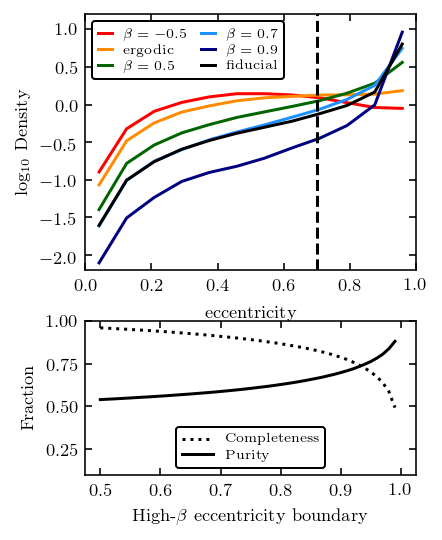

In [9]:
fig = plt.figure()
fig.set_size_inches(columnwidth,4)
gs = gridspec.GridSpec(nrows=5,ncols=1)

ax1 = fig.add_subplot(gs[:3,0])
ax2 = fig.add_subplot(gs[3:,0])

n_mix = len(halo_mixture_arr_apo)
mixture_colors = ['Red','DarkOrange','DarkGreen','DodgerBlue','Navy','Black']
mixture_labels = [r'$\beta=-0.5$','ergodic',r'$\beta=0.5$',r'$\beta=0.7$',r'$\beta=0.9$','fiducial']
n_in_e07 = []
n_in_e09 = []
for i in range(n_mix):
    if i == 0:
        halo_eELz_mixture = project_plot.parse_mixture(eELzs_all_apo[:5], halo_mixture_arr_apo[1])
    elif i == 1:
        halo_eELz_mixture = project_plot.parse_mixture(eELzs_all_apo[:5], halo_mixture_arr_apo[0])
    else:
        halo_eELz_mixture = project_plot.parse_mixture(eELzs_all_apo[:5], halo_mixture_arr_apo[i])
    ##ie
    ecc = np.array([])
    for j in range(len(halo_eELz_mixture)):
        ecc = np.append(ecc,halo_eELz_mixture[j][0])
    hist,edges = np.histogram(ecc, range=(0,1.), bins=12, density=True)
    cents = (edges[1:]+edges[:-1])/2
    ax1.plot(cents, np.log10(hist), color=mixture_colors[i], linewidth=1.5, alpha=1., 
            label=mixture_labels[i])
    n_in_e07.append(np.sum(ecc>0.7))
    n_in_e09.append(np.sum(ecc>0.95))
    
ax1.set_xlim(0,1)
ax1.set_ylim(-2.2,1.2)
ax1.axvline(0.7, linestyle='dashed', color='Black')
ax1.set_xlabel('eccentricity', fontsize=label_fontsize)
ax1.set_ylabel(r'log$_{10}$ Density', fontsize=label_fontsize)
ax1.tick_params(axis='both', labelsize=label_fontsize)
ax1.legend(loc='upper left', fontsize=7, ncol=2, columnspacing=1.0, handlelength=1., labelspacing=0.15)

ecc_GE = np.arange(0.5,1.0,0.01)
n_samples = 100
n_in_GE = np.zeros((3,len(ecc_GE),n_samples)) # Numbers adjusted for the 60:20:20 fiducial model split
fid_inds = np.array([ [0,0,0.5,0,0], [0,0,0,0,0.5] ])
fid_fracs = [0.5,0.5]
n_samps = len(eELzs_all_apo[0][0])

for i in range(n_samples):
    for j in range(len(fid_inds)):
        halo_eELz_mixture = project_plot.parse_mixture(eELzs_all_apo[:5], fid_inds[j], seed=seed, 
                                                       absolute=True)
        eccs = halo_eELz_mixture[0][0]
        eccs[np.isnan(eccs)] = np.ones(np.sum(np.isnan(eccs)))
        for k in range(len(ecc_GE)):
            n_in_GE[j,k,i] = np.sum(eccs>ecc_GE[k])
        ###k
    ###j
###i

GE_completeness = (n_in_GE[1]) / (n_samps*(fid_fracs[1]))
GE_purity = (n_in_GE[1]) / np.sum(n_in_GE,axis=0)
GE_completeness_mean = np.mean(GE_completeness, axis=1)
GE_completeness_std = np.std(GE_completeness, axis=1)
GE_purity_mean = np.mean(GE_purity, axis=1)
GE_purity_std = np.std(GE_purity, axis=1)

# ax2.plot(ecc_GE, GE_completeness_mean, color='Black', linestyle='dotted', label='Completeness', linewidth=1.0)
# ax2.plot(ecc_GE, GE_completeness_mean+GE_completeness_std, color='Black', linestyle='solid', linewidth=0.25)
# ax2.plot(ecc_GE, GE_completeness_mean-GE_completeness_std, color='Black', linestyle='solid', linewidth=0.25)
# ax2.plot(ecc_GE, GE_purity_mean, color='Black', linestyle='solid', label='Purity')
# ax2.plot(ecc_GE, GE_purity_mean+GE_purity_std, color='Black', linestyle='solid', linewidth=0.25)
# ax2.plot(ecc_GE, GE_purity_mean-GE_purity_std, color='Black', linestyle='solid', linewidth=0.25)
# ax2.fill_between( ecc_GE, GE_completeness_mean-GE_completeness_std, 
#                           GE_completeness_mean+GE_completeness_std, alpha=0.25, color='Black')
# ax2.fill_between( ecc_GE, GE_purity_mean-GE_purity_std, 
#                           GE_purity_mean+GE_purity_std, alpha=0.25, color='Black')

ax2.plot(ecc_GE, GE_completeness_mean, color='Black', linestyle='dotted', label='Completeness')
ax2.plot(ecc_GE, GE_purity_mean, color='Black', linestyle='solid', label='Purity')

ax2.set_xlim(0.475,1.025)
ax2.set_ylim(0.1,1)
ax2.set_xlabel(r'High-$\beta$ eccentricity boundary', fontsize=label_fontsize)
ax2.set_ylabel(r'Fraction', fontsize=label_fontsize)
ax2.tick_params(axis='both', labelsize=label_fontsize)
ax2.legend(loc='lower center', fontsize=7, handlelength=2.25, labelspacing=0.1)

fig.tight_layout()
fig.subplots_adjust(hspace=1.)
fig.savefig('fig/APOGEEHaloEccentricityDistribution.pdf')
fig.show()

In [12]:
print_eccs = [0.7,0.9,0.99]
for i in range(len(print_eccs)):
    where_ecc = np.argmin( np.abs(ecc_GE-print_eccs[i]) )
    print('Eccentricity limit: '+str(print_eccs[i]))
    print('Actual limit: '+str(round(ecc_GE[where_ecc],2)))
    print('Completeness = '+str(round(GE_completeness_mean[where_ecc],2)))
    print('Purity = '+str(round(GE_purity_mean[where_ecc],2))+'\n')
###i

Eccentricity limit: 0.7
Actual limit: 0.7
Completeness = 0.91
Purity = 0.59

Eccentricity limit: 0.9
Actual limit: 0.9
Completeness = 0.79
Purity = 0.7

Eccentricity limit: 0.99
Actual limit: 0.99
Completeness = 0.49
Purity = 0.88

